In [463]:
# !pip install tensorflow

In [464]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [465]:
csv_path = 'inp/IBIRITE (ROLA MOCA)_MG.csv'

In [466]:
data = pd.read_csv(csv_path, sep=';')
data

,DATE,Chuva,$Pressão_{Inst}$,$Pressão_{Max}$,$Pressão_{Min}$,$Temperatura_{Inst}$,$Orvalho_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Orvalho_{Max}$,...,$Umidade_{Min}$,$Umidade_{Inst}$,$Vento_{Dir}$,$Vento_{Raj}$,$Vento_{Vel}$,GLOBAL,Latitude,Longitude,Altitude,Qo
0,2008-06-06,0.000000,886.500000,886.533333,886.300000,21.100000,10.500000,22.333333,20.900000,10.766667,...,48.333333,51.666667,56.333333,6.233333,3.133333,1.9223,-20.031457,-44.011249,1198.82,2.195897
1,2008-06-07,0.000000,887.037500,887.250000,886.854167,19.458333,10.083333,20.016667,18.770833,10.637500,...,54.000000,56.458333,76.458333,6.604167,3.537500,19.2513,-20.031457,-44.011249,1198.82,24.544495
2,2008-06-08,0.000000,886.783333,886.983333,886.583333,19.095833,10.504167,19.704167,18.458333,11.054167,...,55.458333,58.750000,79.791667,8.570833,4.383333,17.9175,-20.031457,-44.011249,1198.82,24.486118
3,2008-06-09,0.000000,886.341667,886.516667,886.204167,18.700000,12.312500,19.304167,18.079167,12.662500,...,64.541667,67.583333,125.875000,7.779167,4.033333,16.2483,-20.031457,-44.011249,1198.82,24.430901
4,2008-06-10,0.000000,885.012500,885.220833,884.820833,18.529167,11.920833,19.291667,17.795833,12.566667,...,64.916667,67.833333,139.625000,4.750000,2.329167,13.3562,-20.031457,-44.011249,1198.82,24.378872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2021-12-27,0.000000,880.675000,880.900000,880.425000,22.075000,14.425000,22.783333,21.395833,15.054167,...,60.291667,63.416667,174.083333,6.562500,1.462500,26.3813,-20.031457,-44.011249,1198.82,42.703244
4793,2021-12-28,0.983333,881.758333,882.012500,881.445833,21.458333,15.970833,22.525000,20.708333,16.695833,...,68.333333,72.875000,176.750000,7.200000,1.875000,23.1625,-20.031457,-44.011249,1198.82,42.712820
4794,2021-12-29,0.150000,883.337500,883.616667,883.075000,19.704167,16.345833,20.341667,19.187500,16.850000,...,78.791667,82.000000,131.375000,5.400000,0.254167,18.4593,-20.031457,-44.011249,1198.82,42.718808
4795,2021-12-30,1.008333,881.166667,881.458333,880.958333,18.454167,16.762500,18.820833,18.204167,17.050000,...,88.375000,89.875000,98.000000,5.812500,1.733333,5.3534,-20.031457,-44.011249,1198.82,42.721202


In [467]:
def remove_timezone(dt):
    # HERE `dt` is a python datetime
    # object that used .replace() method
    return dt.replace(tzinfo=None)

In [468]:
# A PARTIR DE 2019 O FORMATO DE DATA DAS TABELAS FOI MODIFICADO, ENTÃO TIVE QUE O TIMEZONE SOMENTE DESTAS ENTRADAS
# data['DATE'].loc[data['DATE'].apply(lambda t: t.tzinfo is not None)]=data['DATE'].loc[data['DATE'].apply(lambda t: t.tzinfo is not None)].apply(remove_timezone)

In [469]:
data.rename(columns={"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "Chuva",
                     "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": "$Pressão_{Inst}$",
                     "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)": "$Pressão_{Max}$",
                     "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)": "$Pressão_{Min}$",
                     "RADIACAO GLOBAL (KJ/m²)": "H",
                     "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "$Temperatura_{Inst}$",
                     "TEMPERATURA DO PONTO DE ORVALHO (°C)": "$Orvalho_{Inst}$",
                     "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)": "$Temperatura_{Max}$",
                     "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)": "$Temperatura_{Min}$",
                     "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)": "$Orvalho_{Max}$",
                     "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)": "$Orvalho_{Min}$",
                     "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)": "$Umidade_{Max}$",
                     "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)": "$Umidade_{Min}$",
                     "UMIDADE RELATIVA DO AR, HORARIA (%)": "$Umidade_{Inst}$",
                     "VENTO, DIREÇÃO HORARIA (gr) (° (gr))": "$Vento_{Dir}$",
                     "VENTO, RAJADA MAXIMA (m/s)": "$Vento_{Raj}$",
                     "VENTO, VELOCIDADE HORARIA (m/s)": "$Vento_{Vel}$",
                     "RADIACAO GLOBAL (Kj/m²)": "GLOBAL"}, inplace=True)
data

,DATE,Chuva,$Pressão_{Inst}$,$Pressão_{Max}$,$Pressão_{Min}$,$Temperatura_{Inst}$,$Orvalho_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Orvalho_{Max}$,...,$Umidade_{Min}$,$Umidade_{Inst}$,$Vento_{Dir}$,$Vento_{Raj}$,$Vento_{Vel}$,GLOBAL,Latitude,Longitude,Altitude,Qo
0,2008-06-06,0.000000,886.500000,886.533333,886.300000,21.100000,10.500000,22.333333,20.900000,10.766667,...,48.333333,51.666667,56.333333,6.233333,3.133333,1.9223,-20.031457,-44.011249,1198.82,2.195897
1,2008-06-07,0.000000,887.037500,887.250000,886.854167,19.458333,10.083333,20.016667,18.770833,10.637500,...,54.000000,56.458333,76.458333,6.604167,3.537500,19.2513,-20.031457,-44.011249,1198.82,24.544495
2,2008-06-08,0.000000,886.783333,886.983333,886.583333,19.095833,10.504167,19.704167,18.458333,11.054167,...,55.458333,58.750000,79.791667,8.570833,4.383333,17.9175,-20.031457,-44.011249,1198.82,24.486118
3,2008-06-09,0.000000,886.341667,886.516667,886.204167,18.700000,12.312500,19.304167,18.079167,12.662500,...,64.541667,67.583333,125.875000,7.779167,4.033333,16.2483,-20.031457,-44.011249,1198.82,24.430901
4,2008-06-10,0.000000,885.012500,885.220833,884.820833,18.529167,11.920833,19.291667,17.795833,12.566667,...,64.916667,67.833333,139.625000,4.750000,2.329167,13.3562,-20.031457,-44.011249,1198.82,24.378872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2021-12-27,0.000000,880.675000,880.900000,880.425000,22.075000,14.425000,22.783333,21.395833,15.054167,...,60.291667,63.416667,174.083333,6.562500,1.462500,26.3813,-20.031457,-44.011249,1198.82,42.703244
4793,2021-12-28,0.983333,881.758333,882.012500,881.445833,21.458333,15.970833,22.525000,20.708333,16.695833,...,68.333333,72.875000,176.750000,7.200000,1.875000,23.1625,-20.031457,-44.011249,1198.82,42.712820
4794,2021-12-29,0.150000,883.337500,883.616667,883.075000,19.704167,16.345833,20.341667,19.187500,16.850000,...,78.791667,82.000000,131.375000,5.400000,0.254167,18.4593,-20.031457,-44.011249,1198.82,42.718808
4795,2021-12-30,1.008333,881.166667,881.458333,880.958333,18.454167,16.762500,18.820833,18.204167,17.050000,...,88.375000,89.875000,98.000000,5.812500,1.733333,5.3534,-20.031457,-44.011249,1198.82,42.721202


In [470]:
data.set_index('DATE', inplace=True)

In [471]:
data.dropna(axis=0, how='all', subset=None, inplace=True)
data.dropna(axis=1, how='all', subset=None, inplace=True)

In [472]:
#DEPENDENDO DO ANO E DA ESTAÇÃO OS VALORES DE RADIAÇÃO ESTÃO EM COLUNAS DIFERENTES
if 'GLOBAL' not in data.columns:
    data.rename(columns={"H": "GLOBAL"}, inplace=True)
if 'H' in data.columns:
    data['GLOBAL'].fillna(data['H'], inplace=True)
    data.drop(['H'], axis=1, inplace=True)

In [473]:
 data = data[
    ['$Temperatura_{Inst}$', '$Temperatura_{Max}$', '$Temperatura_{Min}$', '$Umidade_{Max}$', '$Umidade_{Min}$',
     '$Umidade_{Inst}$', 'GLOBAL']]
cols = list(data)[0:7]
data = data[cols].astype(float)
data

,$Temperatura_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Umidade_{Max}$,$Umidade_{Min}$,$Umidade_{Inst}$,GLOBAL
DATE,,,,,,,
2008-06-06,21.100000,22.333333,20.900000,52.333333,48.333333,51.666667,1.9223
2008-06-07,19.458333,20.016667,18.770833,59.333333,54.000000,56.458333,19.2513
2008-06-08,19.095833,19.704167,18.458333,61.333333,55.458333,58.750000,17.9175
2008-06-09,18.700000,19.304167,18.079167,69.916667,64.541667,67.583333,16.2483
2008-06-10,18.529167,19.291667,17.795833,71.625000,64.916667,67.833333,13.3562
...,...,...,...,...,...,...,...
2021-12-27,22.075000,22.783333,21.395833,66.375000,60.291667,63.416667,26.3813
2021-12-28,21.458333,22.525000,20.708333,76.458333,68.333333,72.875000,23.1625
2021-12-29,19.704167,20.341667,19.187500,84.708333,78.791667,82.000000,18.4593


In [474]:
# GARANTINDO QUE TODOS OS DADOS ESTÃO SENDO TRATADOS COMO FLOAT
data = data.replace(',', '.', regex=True)
data['$Temperatura_{Inst}$'] = data['$Temperatura_{Inst}$'].astype(float)
data['$Temperatura_{Max}$'] = data['$Temperatura_{Max}$'].astype(float)
data['$Temperatura_{Min}$'] = data['$Temperatura_{Min}$'].astype(float)
data['GLOBAL'] = data['GLOBAL'].astype(float)

In [475]:
#DELETANDO ALGUMA LEITURA ONDE O MÁXIMO É MENOR QUE O MÍNIMO
delIndex = data.loc[(data['$Temperatura_{Max}$'] < data['$Temperatura_{Min}$']) | (
        data['$Umidade_{Max}$'] < data['$Umidade_{Min}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [476]:
#DELETANDO ALGUMA LEITURA ONDE O MÁXIMO É MENOR QUE O INSTANTÂNEO
delIndex = data.loc[(data['$Temperatura_{Max}$'] < data['$Temperatura_{Inst}$']) | (
        data['$Umidade_{Max}$'] < data['$Umidade_{Inst}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [477]:
#DELETANDO ALGUMA LEITURA ONDE O INSTANTÂNEO É MENOR QUE O MÍNIMO
delIndex = data.loc[(data['$Temperatura_{Inst}$'] < data['$Temperatura_{Min}$']) | (
                            data['$Umidade_{Inst}$'] < data['$Umidade_{Min}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [478]:
# #MODIFICANDO A UNIDADE DA RADIAÇÃO DE (Kj/m²) PARA (Mj/m²)
data['GLOBAL'] = data['GLOBAL'].mul(0.001)

In [479]:
#DELETANDO ALGUMA LINHA QUE AINDA TENHA NAN
data.dropna(inplace=True)

In [480]:
# EXTRAINDO OS NOMES DAS COLUNAS 
target_names = ['GLOBAL']
variable_names = data.columns.values
variable_names = np.delete(variable_names, np.where(variable_names == target_names))

In [481]:
import matplotlib.pyplot as pl

Index(['2008-06-06', '2008-06-07', '2008-06-08', '2008-06-09', '2008-06-10',
       '2008-06-11', '2008-06-12', '2008-06-13', '2008-06-14', '2008-06-15',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='DATE', length=4797)


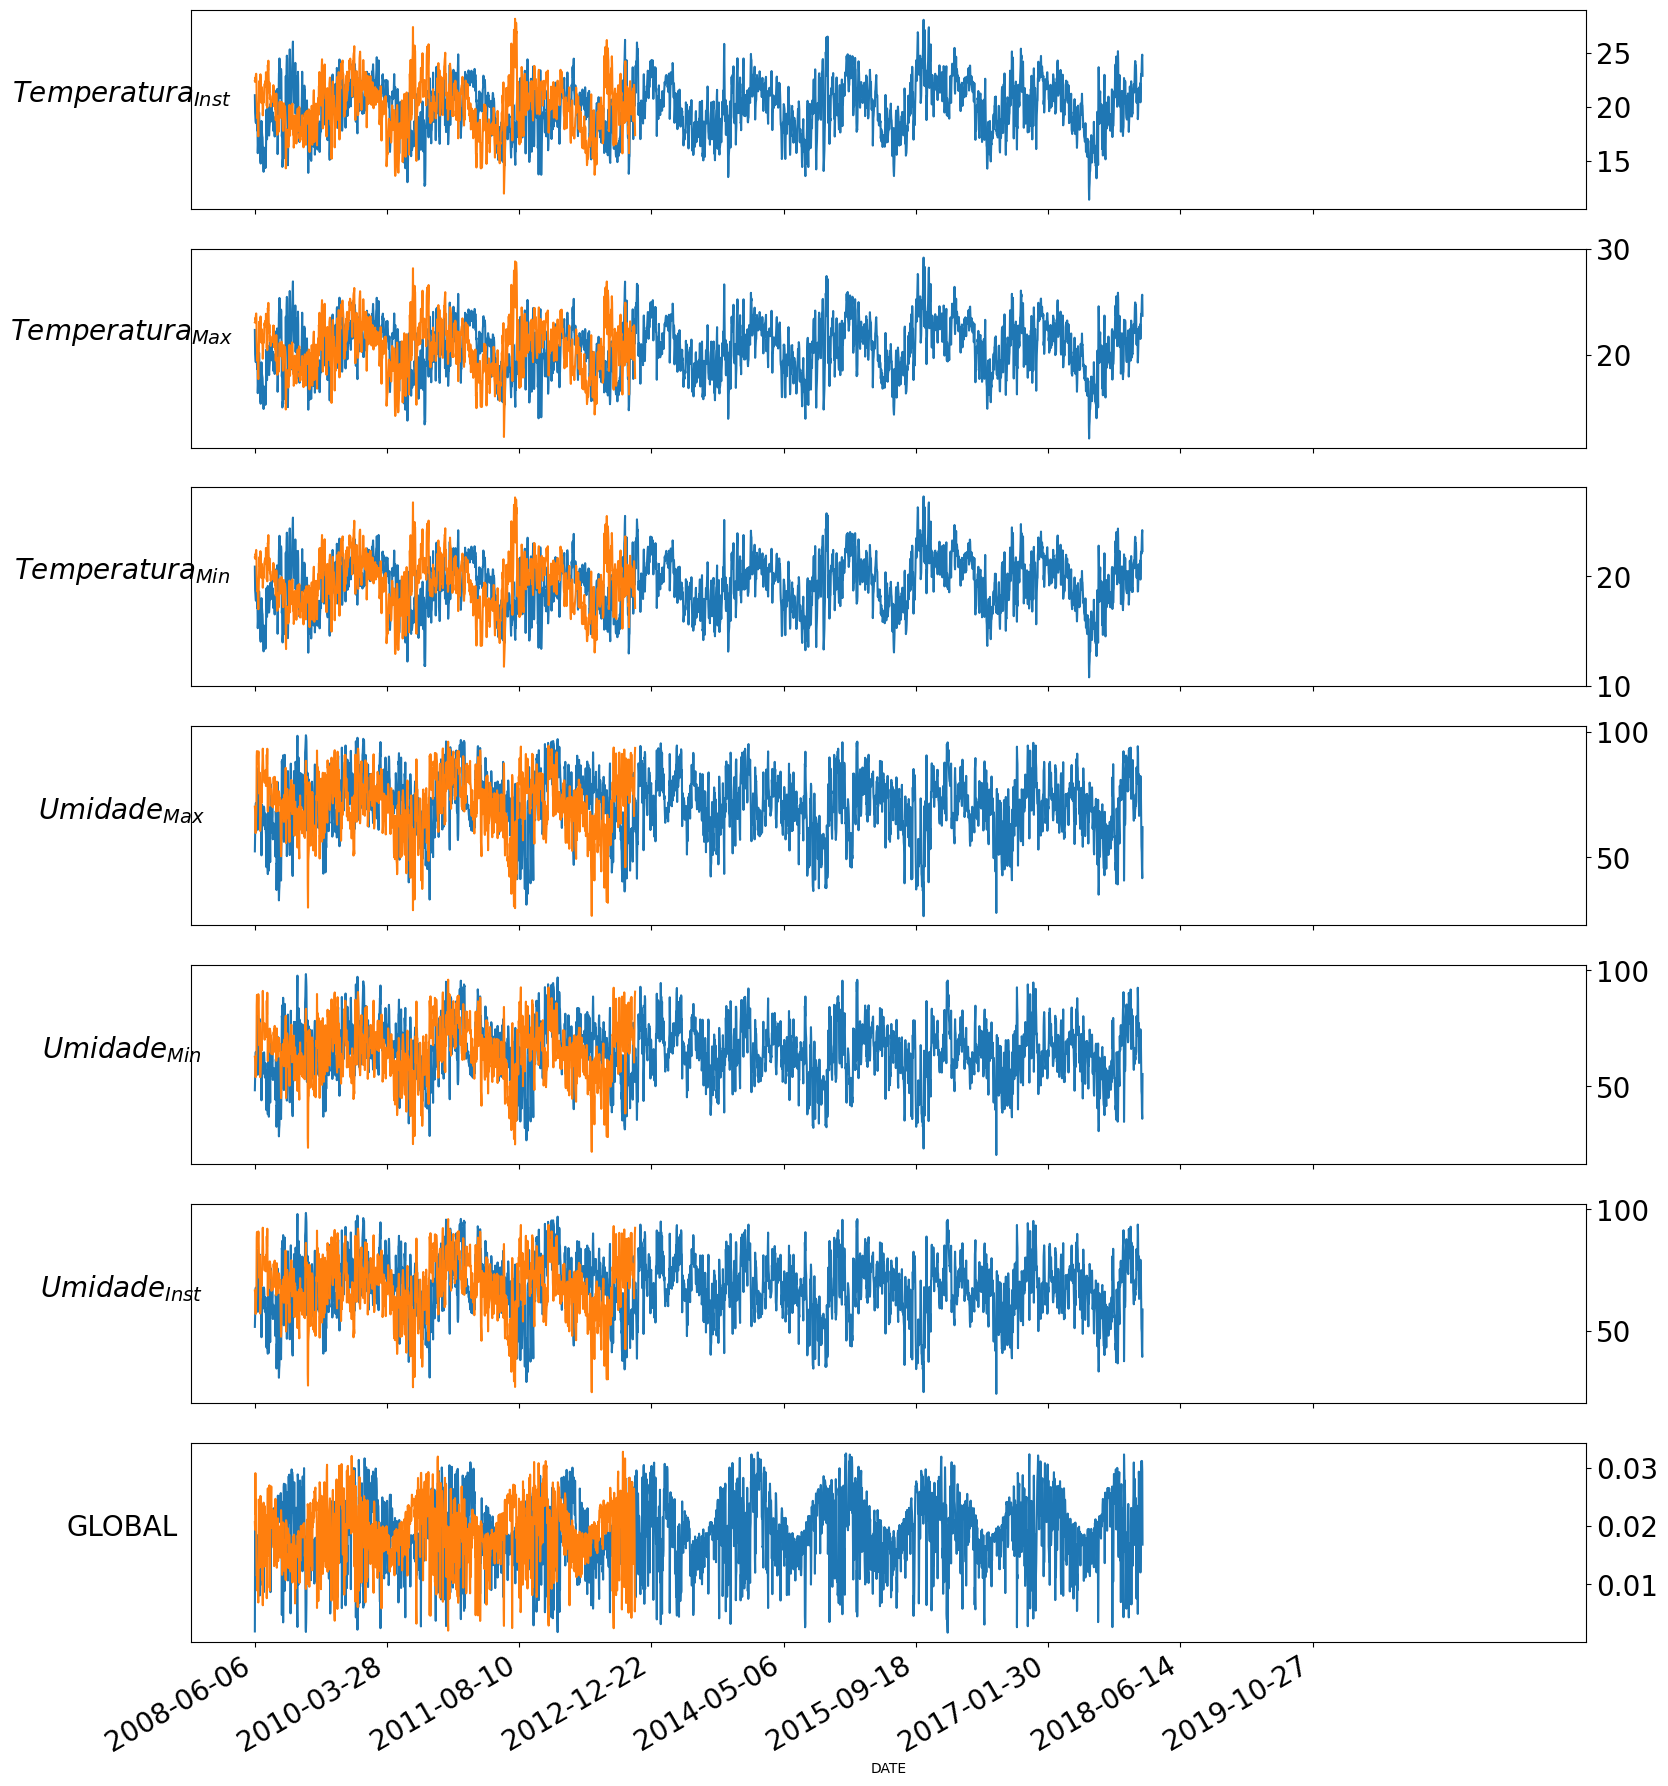

In [482]:
date_range = data.index

var_to_plot = data.columns
df = data[var_to_plot]

n = int(df.shape[0] * 0.7)
df.index = range(df.shape[0])
id0 = df.index <= n
id1 = df.index > n
print(data.index)

pl.rc('text', usetex=False)
# pl.rc('font', family='serif',  serif='Times')
pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
fig=pl.figure(figsize=(18,24))
for i,group in enumerate(data.columns):
    sub=pl.subplot(len(data.columns), 1, i+1)
    data[group].iloc[id0].plot( marker='', label='Training')#,fontsize=16,)#pyplot.plot(dataset[group].values)
    data[group].iloc[id1].plot( marker='', label='Test')#,fontsize=16,)#pyplot.plot(dataset[group].values)
    data[data.columns[i]].plot(marker='', lw=0)
#         pl.axvline(n, color='k', ls='-.')
    pl.ylabel(group,rotation = 0, fontsize=20,)
    sub.yaxis.tick_right()#COLOCANDO OS TICKS NA DIREITA
    sub.yaxis.set_label_coords(-0.05,0.5)#AJUSTANDO A POSIÇÃO DOS LABELS PARA NÃO SOBRESCREVER O PLOT
fig.autofmt_xdate(rotation=30)

# pl.show()

In [483]:
X = data[variable_names]
y = data[target_names]

In [484]:
# import seaborn as sns

# df = X.copy()

# df[target_names] = y.values
# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = pl.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# cmap = cmap = "YlGnBu"
# sns.heatmap(corr, mask=mask, cmap=cmap,  #vmax=.3, center=0,
#             annot=True,  #fmt="d")
#             square=True, linewidths=.5,  #cbar_kws={"shrink": .5},
#             )
# pl.show()

In [485]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
# data

In [486]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
#
# scaler = StandardScaler()
# scaler = scaler.fit(data)
# data = scaler.transform(data)
# data

In [487]:
def split_x_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [488]:
# # split into train and test sets and validation sets
# train_x, train_y = X[:int(len(data) * 0.7)], y[:int(len(data) * 0.7)]
# val_x, val_y = X[int(len(data) * 0.7):int(len(data) * 0.9)], y[int(len(data) * 0.7):int(len(data) * 0.9)]
# test_x, test_y = X[int(len(data) * 0.9):], y[int(len(data) * 0.9):]
#
# train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape


In [489]:
# reshape data
# train_x, train_y = split_x_y(X, 3)
# test_x, test_y = split_x_y(X, 3)
#
# train_x.shape, train_y.shape

In [490]:
train_x = []
train_y = []

n_future = 1
n_past = 3

for i in range(n_past, len(data) - n_future + 1):
    train_x.append(data[i - n_past:i, 0:data.shape[1]])
    train_y.append(data[i + n_future - 1:i + n_future, 0])

train_x, train_y = np.array(train_x), np.array(train_y)
train_x.shape, train_y.shape

((4794, 3, 7), (4794, 1))

In [491]:
# import numpy
#
# train_x = numpy.reshape(train_x, (train_x.shape[0], 3, 3))
# val_x = numpy.reshape(val_x, (val_x.shape[0], 3, 3))
# test_x = numpy.reshape(test_x, (test_x.shape[0], 3, 3))
#
# train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape


In [492]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam
#
# model1 = Sequential()
# # model1.add(InputLayer((6)))
# # model1.add(LSTM(64))
# model1.add(LSTM(64, input_shape=(train_x.shape[1], train_x.shape[2])))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(train_y.shape[1]))
#
# model1.summary()

In [493]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
# model1.add(InputLayer((6)))
# model1.add(LSTM(64))
model1.add(LSTM(64,activation='relu', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model1.add(LSTM(32, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(train_y.shape[1]))

model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [494]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [495]:
history1 = model1.fit(train_x, train_y, epochs=10000, batch_size=32, validation_split=0.1, verbose=0, callbacks=[cp1])

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [496]:
# train_predictions = model1.predict(train_x).flatten()
# train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': train_y})
# train_results

In [497]:
train_predictions = model1.predict(train_x).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': train_y.flatten()})
train_results

150/150 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,0.473998,0.434632
1,0.414167,0.424460
2,0.421516,0.501364
3,0.463425,0.469114
4,0.472999,0.448772
...,...,...
4789,0.540384,0.635574
4790,0.651485,0.598859
4791,0.596092,0.494418
4792,0.471757,0.419995


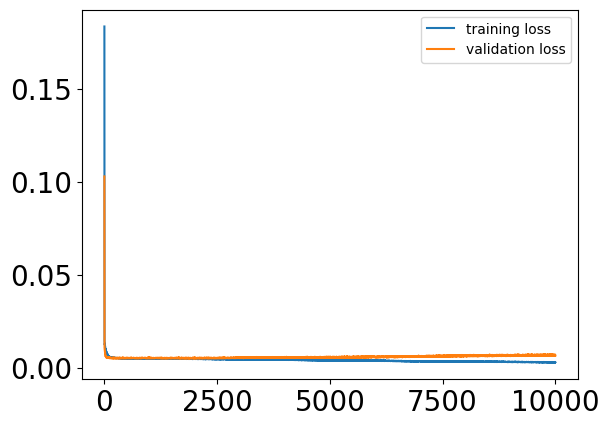

In [498]:
pl.plot(history1.history['loss'], label='training loss')
pl.plot(history1.history['val_loss'], label='validation loss')
pl.legend()
pl.show()